# Correlação

In [79]:
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [20]:
ls

capt4.ipynb               inferencia.ipynb            pesos-alturas.csv
capt9.ipynb               inflacao.csv                Primeiro.ipynb
dolar.csv                 LinearRegression.ipynb      Segundo.ipynb
ds-env.yml                mod-preditivo.csv           Untitled.ipynb
inferencia (cópia).ipynb  mod-preditivo-original.csv


## Fonte: IPEA DATA

Taxa de desemprego aberto na RMSP
Frequência: Mensal de 1984.12 até 2017.08
Fonte: Fundação Sistema Estadual de Análise de Dados, Pesquisa de Emprego e Desemprego (Seade/PED)
Unidade: (%)
Comentário: Quadro: Taxas de desemprego, por tipo - Região Metropolitana de São Paulo, município de São Paulo e demais municípios da Região Metropolitana de São Paulo. In: http://www.seade.gov.br . Obs.: Região Metropolitana de São Paulo (RMSP). Não inclui desemprego oculto (trabalho precário e desemprego por desalento).
Atualizado em: 02/10/2017



Inflação: INPC
Frequência: Mensal de 1979.04 até 2017.09
Fonte: Instituto Brasileiro de Geografia e Estatística, Sistema Nacional de Índices de Preços ao Consumidor (IBGE/SNIPC)
Unidade: (% a.m.)
Comentário: Índice Nacional de Preços ao Consumidor (INPC). Obs.: Até jul. 1999, a estrutura do índice de preços era composta de 7 grupos: 1. Alimentação e bebidas; 2. Habitação; 3. Artigos de residência; 4. Vestuário; 5. Transportes e comunicação; 6. Saúde e cuidados pessoais; 7. Despesas pessoais. A partir de ago. 1999, passou a ser composta de 9 grupos: 1. Alimentação e bebidas; 2. Habitação; 3. Artigos de residência; 4. Vestuário; 5. Transportes; 6. Saúde e cuidados pessoais; 7. Despesas pessoais; 8. Educação, leitura e papelaria; 9. Comunicação. O índice de agosto de 1991, excepcionalmente, foi calculado pelo IBGE como média geométrica dos valores observados em julho e setembro. Por isso, as taxas de variação apresentadas para agosto e setembro de 1991 são iguais.
Atualizado em: 06/10/2017

In [55]:
dolar = pd.read_csv('dolar.csv')
desemprego = pd.read_csv('desemprego.csv')

In [56]:
dolar.head()

,Periodo,Dolar
0,2007.08,1.9652
1,2007.09,1.8988
2,2007.10,1.8002
3,2007.11,1.7691
4,2007.12,1.7852


In [57]:
dolar.describe()

,Periodo,Dolar
count,121.000000,121.000000
mean,2012.189091,96.254918
std,2.943821,415.140965
min,2007.080000,1.563100
25%,2010.020000,1.789014
50%,2012.080000,2.188057
75%,2015.020000,3.135572
max,2017.080000,2313.000000


In [66]:
dolar.loc[dolar.Dolar > 1000, ['Dolar']] = dolar['Dolar'] / 1000

In [68]:
dolar.describe()

,Periodo,Dolar
count,121.000000,121.000000
mean,2012.189091,2.324150
std,2.943821,0.682049
min,2007.080000,1.563100
25%,2010.020000,1.779000
50%,2012.080000,2.060100
75%,2015.020000,2.815839
max,2017.080000,4.051715


In [69]:
desemprego.head()

,Periodo,Desemprego
0,2007.08,10.4
1,2007.09,10.5
2,2007.10,10.0
3,2007.11,10.0
4,2007.12,9.3


In [70]:
desemprego.describe()

,Periodo,Desemprego
count,121.000000,121.000000
mean,2012.189091,10.012397
std,2.943821,2.200325
min,2007.080000,6.900000
25%,2010.020000,8.500000
50%,2012.080000,9.400000
75%,2015.020000,10.700000
max,2017.080000,15.900000


## Correlação entre dolar e inflação

In [71]:
print(np.corrcoef(dolar['Dolar'],desemprego['Desemprego']))

[[ 1.          0.72697675]
 [ 0.72697675  1.        ]]


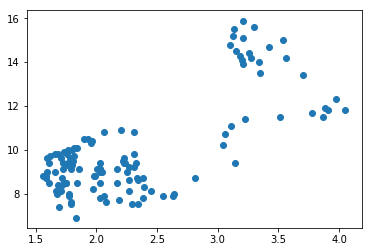

In [75]:
plt.scatter(dolar['Dolar'],desemprego['Desemprego'])

## Gráfico do desemprego e do câmbio

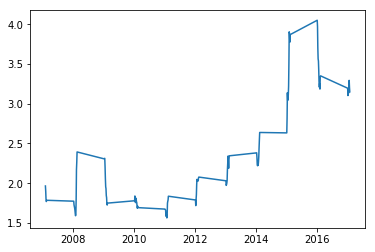

In [76]:
plt.plot(dolar['Periodo'],dolar['Dolar'])


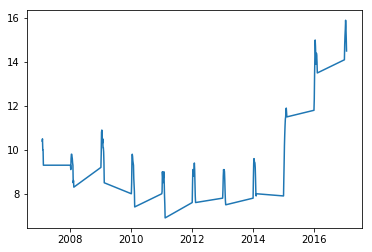

In [77]:
plt.plot(desemprego['Periodo'],desemprego['Desemprego'])


## Correlações não lineares
Spearman

In [82]:
print(stats.spearmanr(dolar['Dolar'],desemprego['Desemprego']))

SpearmanrResult(correlation=0.4841515871869444, pvalue=1.8418838317919234e-08)


### Vamos criar duas variáveis com correlação 1/log

In [83]:
independente = np.linspace(1,stop=5,num=50)

In [84]:
independente

array([ 1.        ,  1.08163265,  1.16326531,  1.24489796,  1.32653061,
        1.40816327,  1.48979592,  1.57142857,  1.65306122,  1.73469388,
        1.81632653,  1.89795918,  1.97959184,  2.06122449,  2.14285714,
        2.2244898 ,  2.30612245,  2.3877551 ,  2.46938776,  2.55102041,
        2.63265306,  2.71428571,  2.79591837,  2.87755102,  2.95918367,
        3.04081633,  3.12244898,  3.20408163,  3.28571429,  3.36734694,
        3.44897959,  3.53061224,  3.6122449 ,  3.69387755,  3.7755102 ,
        3.85714286,  3.93877551,  4.02040816,  4.10204082,  4.18367347,
        4.26530612,  4.34693878,  4.42857143,  4.51020408,  4.59183673,
        4.67346939,  4.75510204,  4.83673469,  4.91836735,  5.        ])

In [174]:
np.random.seed(101)
dependente = [1 / (np.log(x) + (np.random.rand()*0.7)) for x in independente] 


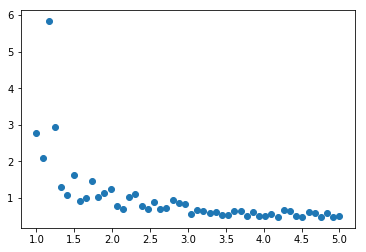

In [175]:
plt.scatter(independente,dependente)

In [177]:
# Calculando Pearson:
pearson_r = np.corrcoef(independente,dependente)
# Calculando Spearman
spearman_r = stats.spearmanr(independente,dependente)
print('r Pearson',pearson_r)
print('r Spearman',spearman_r)

r Pearson [[ 1.        -0.6051513]
 [-0.6051513  1.       ]]
r Spearman SpearmanrResult(correlation=-0.89733493397358943, pvalue=1.1314262188109336e-18)
